In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import copy
import matplotlib.colors
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [2]:
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_pca = np.load("../Embeddings/s01_pca.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")
PopData = pd.read_csv("../SamusikData/population_assignments01.csv")
Assignments = np.array(PopData.Population)

In [3]:
np.random.seed(1)

In [4]:
def run_crossval(X, y):
    cv = StratifiedKFold(n_splits=5)  

    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifier = SVC(kernel='rbf', random_state = 1)
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = np.array(X[train])
        X_test = np.array(X[test])
        y_train = np.array(y[train])
        y_test = np.array(y[test])

        classifier.fit(X_train, y_train)
        acc = metrics.accuracy_score(y_test, classifier.predict(X_test))
        print("Fold " + str(i+1) + ": " + str(acc))
        accs.append(acc)
    print("Mean Accuracy: " + str(np.mean(accs)))
    print("Accuracy SD: " + str(np.std(accs)))
    return np.mean(accs), np.std(accs)

### PCA Accuracy

In [5]:
X_pca = s01_pca[:,0:2]
y = Assignments

In [6]:
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.5656478443561849
Fold 2: 0.568698555229379
Fold 3: 0.5640361480458183
Fold 4: 0.5726126748402693
Fold 5: 0.5632627216209993
Mean Accuracy: 0.5668515888185301
Accuracy SD: 0.0034309494985927916


### UMAP Accuracy

In [7]:
X_umap = s01_umap[:,0:2]
y = Assignments

In [8]:
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.7353940021873021
Fold 2: 0.739538364128245
Fold 3: 0.7370632590801819
Fold 4: 0.7438554078167271
Fold 5: 0.745279760534193
Mean Accuracy: 0.7402261587493297
Accuracy SD: 0.003808860002442014


### tSNE Accuracy

In [9]:
X_tsne = s01_tsne[:,0:2]
y = Assignments

In [10]:
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.7374661831577736
Fold 2: 0.7412651816036379
Fold 3: 0.7405168940309675
Fold 4: 0.7442583318943188
Fold 5: 0.7468915496200783
Mean Accuracy: 0.7420796280613551
Accuracy SD: 0.0032339039577475933


### 2 Layer AE Accuracy

In [11]:
X_2layer = s01_2layer[:,0:2]
y = Assignments

In [12]:
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.5013526736890578
Fold 2: 0.510619927473666
Fold 3: 0.5097565187359696
Fold 4: 0.5164335463074886
Fold 5: 0.5093829150356897
Mean Accuracy: 0.5095091162483744
Accuracy SD: 0.004812199563238855


### 6 Layer AE Accuracy

In [13]:
X_6layer = s01_6layer[:,0:2]
y = Assignments

In [14]:
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6812870546249928
Fold 2: 0.683819720255569
Fold 3: 0.6827260691878202
Fold 4: 0.6869855522937892
Fold 5: 0.6886368869445084
Mean Accuracy: 0.6846910566613359
Accuracy SD: 0.00272183466057234


### VAE Accuracy

In [15]:
X_vae = s01_vae[:,0:2]
y = Assignments

In [16]:
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.702008864329707
Fold 2: 0.7088585736487654
Fold 3: 0.7052898175329534
Fold 4: 0.711679042191907
Fold 5: 0.7088418144139995
Mean Accuracy: 0.7073356224234664
Accuracy SD: 0.003347027322008139


### Figure Generation

In [17]:
# Create lists for the plot
Methods = ['PCA', 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

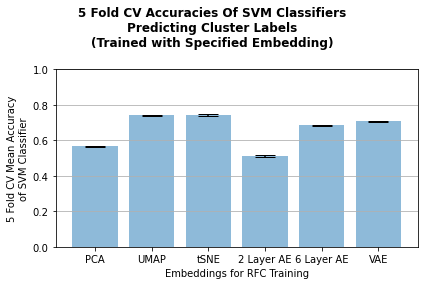

In [18]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof SVM Classifier')
ax.set_xlabel('Embeddings for RFC Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of SVM Classifiers\nPredicting Cluster Labels\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/SVMClassiferAccuracies.png')
plt.show()